In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.base import clone


In [22]:
wine=datasets.load_wine()
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()
df.info()
df.isnull().sum()
df.describe()
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [23]:
X=wine.data
y=wine.target
feature_names=wine.feature_names
target_names=wine.target_names

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=54,stratify=y)


In [26]:
pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('svc',SVC(kernel='rbf',C=10,gamma='scale')) 
])

In [27]:
pipe.fit(X_train,y_train)


,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [28]:
y_pred=pipe.predict(X_test)

In [33]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc*100:.2f}%")
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



[None, None, None, None, None, None, None, None, None]

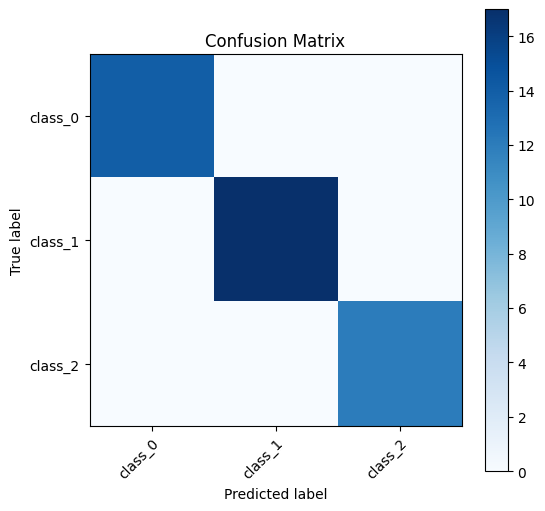

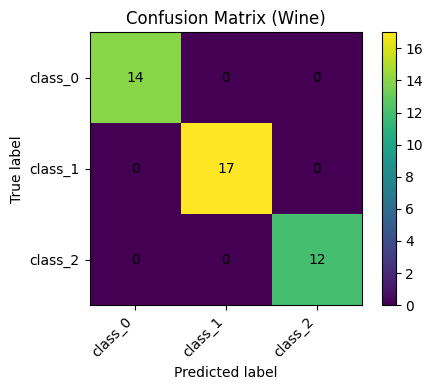

In [35]:

# 6) Plot confusion matrix
fig_cm, ax_cm = plt.subplots(figsize=(5, 4))
im = ax_cm.imshow(cm, interpolation="nearest")
ax_cm.set_title("Confusion Matrix (Wine)")
ax_cm.set_xlabel("Predicted label")
ax_cm.set_ylabel("True label")
ax_cm.set_xticks(np.arange(len(target_names)))
ax_cm.set_yticks(np.arange(len(target_names)))
ax_cm.set_xticklabels(target_names, rotation=45, ha="right")
ax_cm.set_yticklabels(target_names)

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax_cm.text(j, i, cm[i, j], ha="center", va="center")

fig_cm.colorbar(im, ax=ax_cm)
plt.tight_layout()
plt.show()


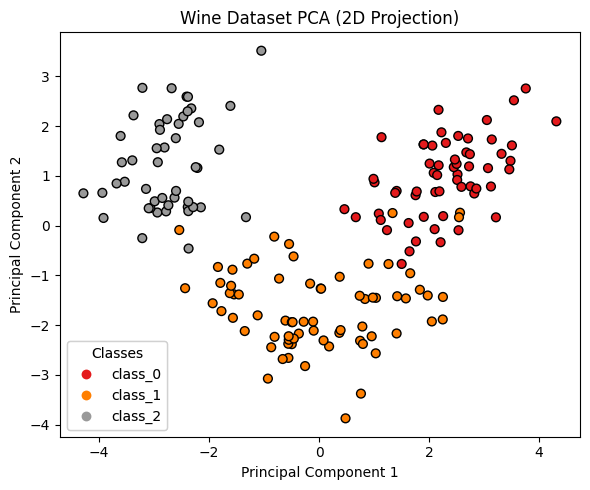

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
pipe2 = clone(pipe)
pipe2.fit(X_train, y_train)
Z = pipe2.predict(X_test)
handles = list(scatter.legend_elements()[0])  # was a NumPy array
labels  = list(wine.target_names)            # also ensure it's a plain list




fig, ax = plt.subplots(figsize=(6, 5))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
legend1 = ax.legend(handles=handles, labels=labels, title="Classes")
ax.add_artist(legend1)
ax.set_title("Wine Dataset PCA (2D Projection)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
plt.tight_layout()
plt.show()